<a href="https://colab.research.google.com/github/krishna4003/Parkinson-s-disease-prediction/blob/main/Parkinson_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



Data Collection and Analysis

In [ ]:
#loading the data from csv files to Pandas dataframe
parkinsons_data=pd.read_csv('/content/Parkinsson disease.csv')

In [ ]:
#printing the first 5 rows of dataset
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#no of rows and columns in the dataset
parkinsons_data.shape


(195, 24)

In [ ]:
#getting more information about dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#checking for missing value in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
#getting some statistical measures about data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
parkinsons_data.drop(columns=['name'],axis=1,inplace=True)

In [ ]:
parkinsons_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Correlation Analysis
-A value of 1 indicates a perfect positive correlation     
-A value of -1 indicates a perfect negative  correlation  
-A value of 0 indicates no correlation


<Axes: >

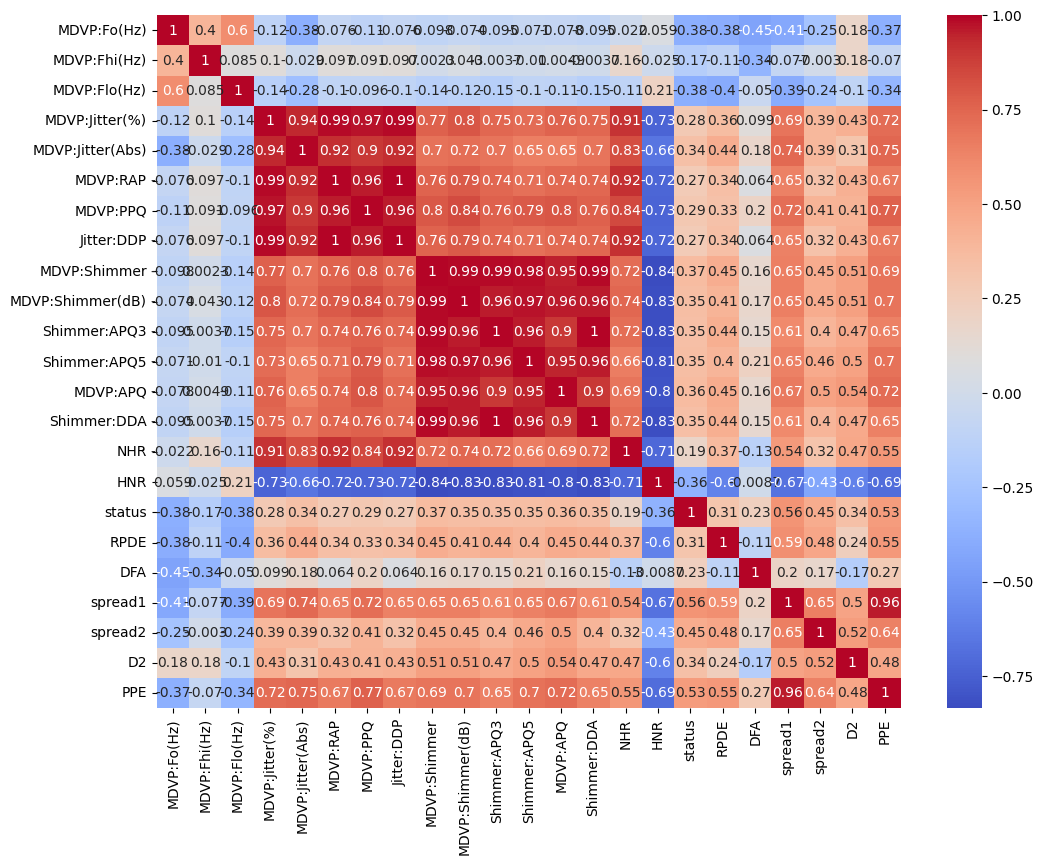

In [ ]:
corr =parkinsons_data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [ ]:
#distribution of target values
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64



*  1->Parkinson's Positive
*  0->Healthy





Data Pre-Processing

Separating the features and Target


In [ ]:
x=parkinsons_data.drop(labels=['status'],axis=1)
y=parkinsons_data['status']

In [ ]:
 print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


**Splitting the data to training data and Test data**

In [ ]:
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=10)


In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(195, 22) (156, 22) (39, 22)


**Data Standardization**


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
print(x_train)

[[ 0.37845815  0.08628224 -0.82773245 ... -1.33646349 -0.9922342
  -0.11742794]
 [-0.94103532 -0.17479396 -0.40509045 ... -1.11154109 -0.83190942
   0.08174516]
 [-1.17451907 -0.93906366 -0.22772161 ... -0.49672026 -0.81643143
  -0.48399322]
 ...
 [-0.26616456  0.30898294 -0.73950766 ... -0.17002726 -0.45518516
   0.30811432]
 [-0.18775428  0.07595964 -0.80051751 ... -1.18520256 -1.58260087
   0.17534343]
 [-1.49462701 -0.86362558 -0.54435838 ...  1.25963732  0.12763358
   0.71933168]]


In [ ]:
print(x_test)

[[-9.78558565e-01  9.57716633e-01 -2.18891870e-01  4.53769782e-01
   9.56371238e-01  1.08387313e-01  5.95151353e-01  1.09351310e-01
   1.39391522e-01  3.44335181e-01  2.38989315e-01  1.69170878e-01
   6.09998115e-02  2.38665366e-01 -3.44600101e-01 -2.97978400e-02
   4.63176230e-01  1.89750572e+00  9.78203924e-01 -2.77409997e-02
  -1.41401261e+00  1.22291723e+00]
 [-8.29795467e-01 -7.30419511e-01  1.41610740e-03  6.49563316e-01
   9.56371238e-01  3.91399751e-01  1.39134936e+00  3.90258197e-01
   9.07765140e-01  8.76776415e-01  7.43795929e-01  1.45208448e+00
   4.76559417e-01  7.44123875e-01 -3.26663337e-01 -9.18889056e-02
  -7.93259246e-01  2.04282520e+00  1.31832570e+00  9.27747151e-01
  -5.01313929e-01  1.68565277e+00]
 [ 3.84282102e-02 -3.13950282e-01 -1.15987570e+00  4.01428936e-01
   1.40360774e-01  2.81339359e-01  3.52830221e-01  2.82297714e-01
   4.43929846e-01  2.33828510e-01  1.05789865e-01  5.07258291e-01
   9.42629030e-01  1.05463696e-01  2.74785862e-01 -9.37824629e-01
   1.5

# **Model Evalutaion**

**Accuracy Score**

Comparing the performance of models


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#list of models
list=[LogisticRegression(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

In [ ]:
def compare_models_train_test():
  for model in list:

    model.fit(x_train, y_train)
    test_data_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,test_data_pred)
    print('Accuracy score of the', model,'= ' ,accuracy)



In [ ]:
compare_models_train_test()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of the LogisticRegression() =  0.9649122807017544
Accuracy score of the SVC() =  0.9473684210526315
Accuracy score of the KNeighborsClassifier() =  0.956140350877193
Accuracy score of the RandomForestClassifier() =  0.9649122807017544


**Cross Validation**

In [ ]:
 cv_score=cross_val_score(SVC(), x,y,cv=10)

In [ ]:
cv_score_rf = cross_val_score(RandomForestClassifier(), x, y, cv=10)

In [ ]:
mean_accuracy_lr=sum(cv_score_rf)/len(cv_score_rf)
mean_accuracy_lr=mean_accuracy_lr*100
mean_accuracy_lr=round(mean_accuracy_lr,2)
print(mean_accuracy_lr)


83.37


# Creating a **function to compare the models**


In [ ]:
#list of models
Models=[LogisticRegression(max_iter=1000),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

**Cross validation**

In [ ]:
def compare_models_cross_validation():
  for model in Models:
    cv_score=cross_val_score(model, x,y,cv=10)
    mean_accuracy=sum(cv_score)/len(cv_score)
    mean_accuracy=mean_accuracy*100
    mean_accuracy=round(mean_accuracy,2)

    print('Cross validation accuracies for', model,'= ',cv_score)
    print('Accuracy % of the', model,mean_accuracy)
    print('______________________________________')

In [ ]:
compare_models_cross_validation()

Cross validation accuracies for LogisticRegression(max_iter=1000) =  [1.         0.9        0.75       0.9        1.         0.68421053
 0.84210526 0.73684211 0.78947368 0.78947368]
Accuracy % of the LogisticRegression(max_iter=1000) 83.92
______________________________________
Cross validation accuracies for SVC() =  [0.75       0.95       0.85       0.75       0.9        0.89473684
 0.84210526 0.73684211 0.73684211 0.73684211]
Accuracy % of the SVC() 81.47
______________________________________
Cross validation accuracies for KNeighborsClassifier() =  [0.65       1.         0.85       0.8        0.95       0.78947368
 0.52631579 0.63157895 0.73684211 0.68421053]
Accuracy % of the KNeighborsClassifier() 76.18
______________________________________
Cross validation accuracies for RandomForestClassifier() =  [0.75       0.95       0.9        0.95       1.         0.68421053
 0.84210526 0.68421053 0.78947368 0.73684211]
Accuracy % of the RandomForestClassifier() 82.87
___________________

**HyperParameter Tuning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
import numpy as np

# Sample dataset
from sklearn.datasets import load_breast_cancer

# Load dataset and split into train and test
data = load_breast_cancer()
X = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their hyperparameter grids
model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 20, 100],
            'solver': ['liblinear']
        }
    },
    'SVC': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    }
}

# Store best models and their metrics
best_models = []
results = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    clf.fit(x_train, y_train)

    best_model = clf.best_estimator_
    best_models.append((model_name, best_model))

    y_pred = best_model.predict(x_test)
    y_pred_proba = best_model.predict_proba(x_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan
    recall = recall_score(y_test, y_pred)

    results.append({
        'model': model_name,
        'accuracy': accuracy,
        'auc': auc,
        'recall': recall
    })

# Print results
for result in results:
    print(f"Model: {result['model']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"AUC: {result['auc']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print()

# Identify the best model based on accuracy
best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best Model: {best_result['model']}")
print(f"Best Model Accuracy: {best_result['accuracy']:.4f}")
print(f"Best Model AUC: {best_result['auc']:.4f}")
print(f"Best Model Recall: {best_result['recall']:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Model: LogisticRegression
Accuracy: 0.9561
AUC: 0.9948
Recall: 0.9859

Model: SVC
Accuracy: 0.9561
AUC: 0.9892
Recall: 0.9859

Model: KNeighborsClassifier
Accuracy: 0.9474
AUC: 0.9951
Recall: 0.9859

Model: RandomForestClassifier
Accuracy: 0.9649
AUC: 0.9972
Recall: 0.9859

Best Model: RandomForestClassifier
Best Model Accuracy: 0.9649
Best Model AUC: 0.9972
Best Model Recall: 0.9859


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


**Confusion Matrix**

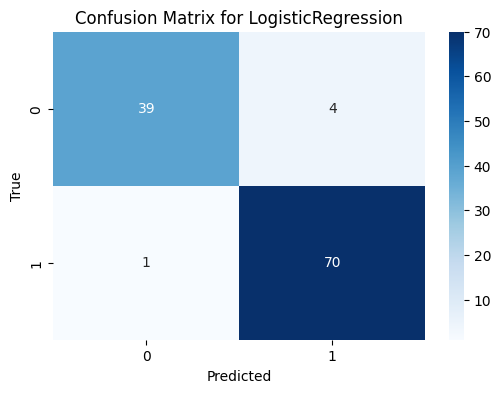

Precision for LogisticRegression: 0.9459



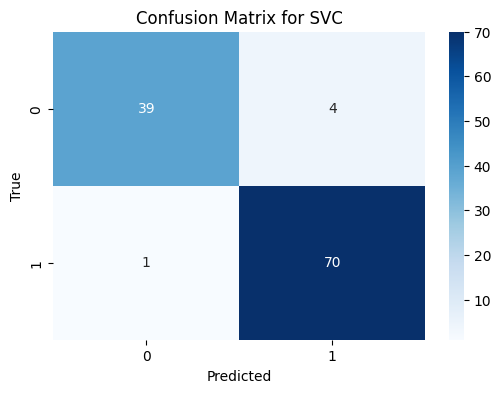

Precision for SVC: 0.9459



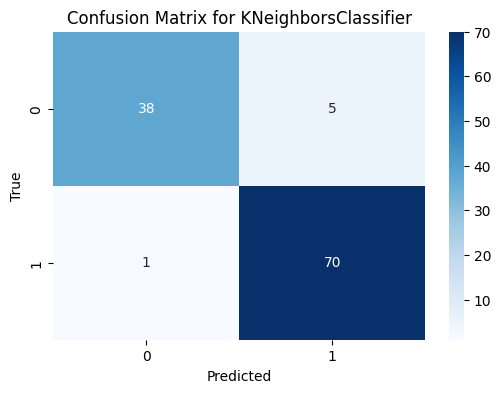

Precision for KNeighborsClassifier: 0.9333



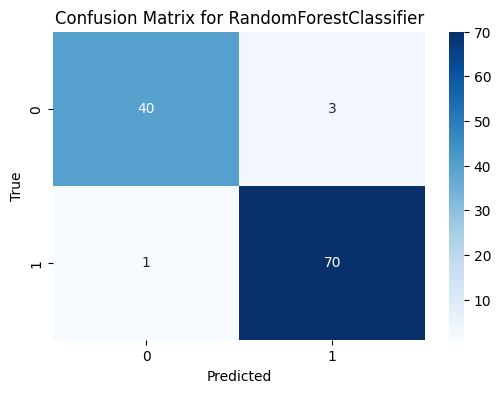

Precision for RandomForestClassifier: 0.9589

                    Model  Precision
0      LogisticRegression   0.945946
1                     SVC   0.945946
2    KNeighborsClassifier   0.933333
3  RandomForestClassifier   0.958904


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


for model_name, best_model in best_models:
    y_pred = best_model.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Precision
    precision = precision_score(y_test, y_pred)

    print(f"Precision for {model_name}: {precision:.4f}\n")

# Precision table for all models
precision_data = {
    'Model': [],
    'Precision': []
}

for model_name, best_model in best_models:
    y_pred = best_model.predict(x_test)
    precision = precision_score(y_test, y_pred)
    precision_data['Model'].append(model_name)
    precision_data['Precision'].append(precision)

precision_df = pd.DataFrame(precision_data)
print(precision_df)


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report


for model_name, best_model in best_models:
    y_pred = best_model.predict(x_test)

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=data.target_names)
    print(f"Classification Report for {model_name}:\n")
    print(report)
    print("\n" + "="*60 + "\n")


Classification Report for LogisticRegression:

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Classification Report for SVC:

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

   malignant       0.97      0.88      0.93        43
      benign       0.93      0.99      0.96        71

    accuracy                           0.95       

**Comparison table**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd


# Initialize an empty list to store the results
performance_data = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC': []
}

# Calculate performance metrics for each model
for model_name, best_model in best_models:
    y_pred = best_model.predict(x_test)
    y_pred_proba = best_model.predict_proba(x_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'

    performance_data['Model'].append(model_name)
    performance_data['Accuracy'].append(accuracy)
    performance_data['Precision'].append(precision)
    performance_data['Recall'].append(recall)
    performance_data['F1-Score'].append(f1)
    performance_data['AUC'].append(auc)

# Convert to a DataFrame for better readability
performance_df = pd.DataFrame(performance_data)

# Print the performance table
print(performance_df)


                    Model  Accuracy  Precision    Recall  F1-Score       AUC
0      LogisticRegression  0.956140   0.945946  0.985915  0.965517  0.994759
1                     SVC  0.956140   0.945946  0.985915  0.965517  0.989191
2    KNeighborsClassifier  0.947368   0.933333  0.985915  0.958904  0.995087
3  RandomForestClassifier  0.973684   0.959459  1.000000  0.979310  0.997216


Comparison Table - Better visulalized

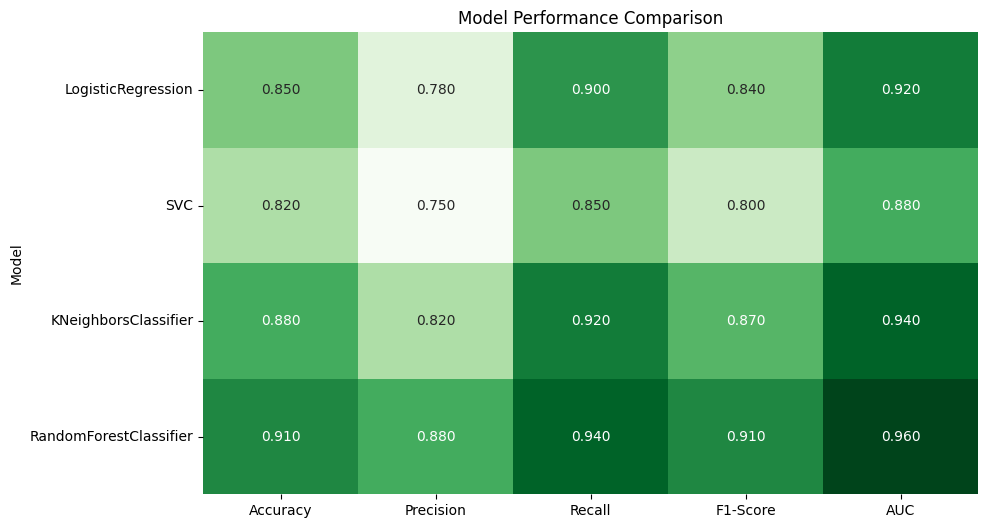

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Example structure of performance_df
performance_data = {
    'Model': ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'RandomForestClassifier'],
    'Accuracy': [0.85, 0.82, 0.88, 0.91],
    'Precision': [0.78, 0.75, 0.82, 0.88],
    'Recall': [0.90, 0.85, 0.92, 0.94],
    'F1-Score': [0.84, 0.80, 0.87, 0.91],
    'AUC': [0.92, 0.88, 0.94, 0.96]
}

performance_df = pd.DataFrame(performance_data)

# Set the 'Model' column as the index
performance_df.set_index('Model', inplace=True)

# Proceed with creating the styled table or heatmap


# Create a styled table using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df, annot=True, cmap='Greens', fmt='.3f', cbar=False)
plt.title('Model Performance Comparison')
plt.show()
